<a href="https://colab.research.google.com/github/lukiod/dl-college/blob/main/lab3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Experiment 1: Setosa vs Versicolor
--------------------------------------------------
Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.0314
Epoch 200, Loss: 0.0110
Epoch 300, Loss: 0.0066
Epoch 400, Loss: 0.0046
Epoch 500, Loss: 0.0036
Epoch 600, Loss: 0.0029
Epoch 700, Loss: 0.0025
Epoch 800, Loss: 0.0021
Epoch 900, Loss: 0.0019

Model Parameters:
Input size: 4
Hidden layer size: 5
Output size: 1
Learning rate: 0.01

Performance Metrics:
Accuracy: 1.0

Confusion Matrix:
[[17  0]
 [ 0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Experiment 2: Versicolor vs Virginica
--------------------------------------------------
Epoch 0, Loss: 0.6936
Epoch 100, Loss: 0.1120
Epoch 200, Loss: 0.0361
E

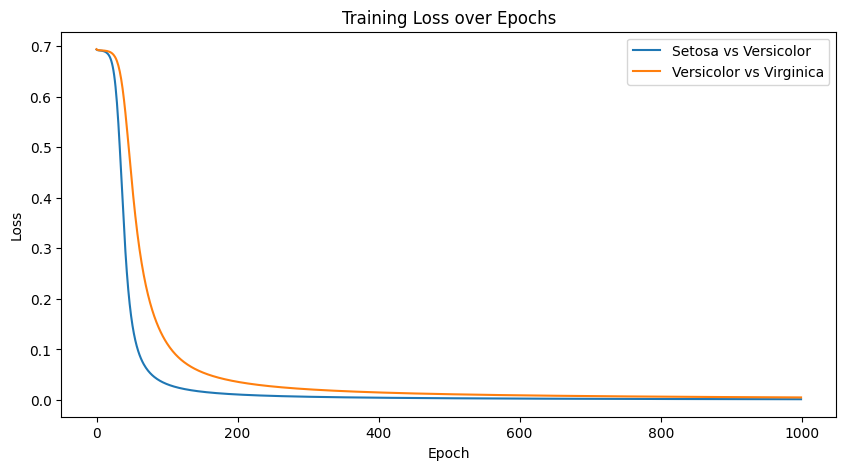

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]

        # Output layer
        d_z2 = output - y
        d_W2 = np.dot(self.a1.T, d_z2)
        d_b2 = np.sum(d_z2, axis=0, keepdims=True)

        # Hidden layer
        d_a1 = np.dot(d_z2, self.W2.T)
        d_z1 = d_a1 * self.sigmoid_derivative(self.a1)
        d_W1 = np.dot(X.T, d_z1)
        d_b1 = np.sum(d_z1, axis=0, keepdims=True)

        # Update weights and biases
        self.W2 -= self.lr * d_W2
        self.b2 -= self.lr * d_b2
        self.W1 -= self.lr * d_W1
        self.b1 -= self.lr * d_b1

    def train(self, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Calculate loss
            loss = -np.mean(y * np.log(output + 1e-15) + (1 - y) * np.log(1 - output + 1e-15))
            losses.append(loss)

            # Backward pass
            self.backward(X, y, output)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

        return losses

    def predict(self, X):
        output = self.forward(X)
        return (output >= 0.5).astype(int)

def run_experiment(class1, class2, title):
    print(f"\n{title}")
    print("-" * 50)

    # Load and prepare data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Select specified classes
    mask = (y == class1) | (y == class2)
    X = X[mask]
    y = y[mask]

    # Convert labels to binary (0 and 1)
    y = (y == class2).astype(int)
    y = y.reshape(-1, 1)

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train MLP
    mlp = MLP(input_size=4, hidden_size=5, output_size=1)
    losses = mlp.train(X_train_scaled, y_train, epochs=1000)

    # Make predictions
    y_pred = mlp.predict(X_test_scaled)

    # Print results
    print("\nModel Parameters:")
    print(f"Input size: 4")
    print(f"Hidden layer size: 5")
    print(f"Output size: 1")
    print(f"Learning rate: {mlp.lr}")

    print("\nPerformance Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return losses

# Run both experiments
losses1 = run_experiment(0, 1, "Experiment 1: Setosa vs Versicolor")
losses2 = run_experiment(1, 2, "Experiment 2: Versicolor vs Virginica")

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(losses1, label='Setosa vs Versicolor')
plt.plot(losses2, label='Versicolor vs Virginica')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()



In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

class MulticlassPerceptron:
    def __init__(self, n_features, n_classes, learning_rate=0.01, n_iterations=1000):
        self.n_features = n_features
        self.n_classes = n_classes
        self.lr = learning_rate
        self.n_iterations = n_iterations
        # Initialize weights and bias for each class
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Calculate scores for each class
                scores = np.dot(self.weights, x_i) + self.bias
                # Predicted class is the one with highest score
                predicted_class = np.argmax(scores)
                # Update weights if prediction is wrong
                if predicted_class != y[idx]:
                    # Decrease weights for predicted class
                    self.weights[predicted_class] -= self.lr * x_i
                    self.bias[predicted_class] -= self.lr
                    # Increase weights for actual class
                    self.weights[y[idx]] += self.lr * x_i
                    self.bias[y[idx]] += self.lr

    def predict(self, X):
        predictions = []
        for x_i in X:
            scores = np.dot(self.weights, x_i) + self.bias
            predictions.append(np.argmax(scores))
        return np.array(predictions)

# Load and prepare data
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the perceptron
perceptron = MulticlassPerceptron(n_features=4, n_classes=3, learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train_scaled, y_train)

# Make predictions
y_pred = perceptron.predict(X_test_scaled)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print model parameters
print("\nModel Parameters:")
print("Weights shape:", perceptron.weights.shape)
print("Weights:\n", perceptron.weights)
print("Bias:", perceptron.bias)


Accuracy: 0.9777777777777777

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Model Parameters:
Weights shape: (3, 4)
Weights:
 [[-0.04943771  0.04557337 -0.10857267 -0.10011158]
 [ 0.04099713  0.01119346 -0.05946202 -0.03986425]
 [ 0.00844058 -0.05676683  0.1680347   0.13997583]]
Bias: [ 0.    0.14 -0.14]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

class MLP:
    def __init__(self, hidden_size=4):
        self.hidden_size = hidden_size
        self.W1 = np.random.randn(4, hidden_size) * 0.01
        self.W2 = np.random.randn(hidden_size, 3) * 0.01

    def forward(self, X):
        self.hidden = 1 / (1 + np.exp(-np.dot(X, self.W1)))
        self.output = np.exp(np.dot(self.hidden, self.W2))
        self.output = self.output / np.sum(self.output, axis=1, keepdims=True)
        return self.output

    def backward(self, X, y, learning_rate=0.1):
        output_error = self.output - y
        hidden_error = np.dot(output_error, self.W2.T) * self.hidden * (1 - self.hidden)
        self.W2 -= learning_rate * np.dot(self.hidden.T, output_error)
        self.W1 -= learning_rate * np.dot(X.T, hidden_error)

    def summary(self):
        print("Model Summary:")
        print("----------------------------------------------------")
        print(f"Layer 1 (Input -> Hidden):")
        print(f"  - Weights shape: {self.W1.shape}")
        print(f"  - Number of parameters: {self.W1.size}")
        print(f"  - Activation: Sigmoid")
        print(f"  - Hidden Size: {self.hidden_size}")
        print("----------------------------------------------------")
        print(f"Layer 2 (Hidden -> Output):")
        print(f"  - Weights shape: {self.W2.shape}")
        print(f"  - Number of parameters: {self.W2.size}")
        print(f"  - Activation: Softmax")
        print(f"  - Output Size: 3 (Number of classes)")
        print("----------------------------------------------------")
        total_params = self.W1.size + self.W2.size
        print(f"Total Trainable Parameters: {total_params}")
        print("----------------------------------------------------")


iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = np.eye(3)[iris.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = MLP()

# Print Model Summary
model.summary()

print("\nEpoch\tLoss\t\tAccuracy\tPrecision\tRecall\t\tF1")
print("-" * 80)

for epoch in range(100):
    output = model.forward(X_train)
    model.backward(X_train, y_train)

    if epoch % 10 == 0:
        predictions = np.argmax(output, axis=1)
        actual = np.argmax(y_train, axis=1)

        loss = -np.mean(np.sum(y_train * np.log(output + 1e-15), axis=1))
        accuracy = np.mean(predictions == actual)
        precision, recall, f1, _ = precision_recall_fscore_support(actual, predictions, average='macro')

        print(f"{epoch}\t{loss:.4f}\t\t{accuracy:.4f}\t\t{precision:.4f}\t\t{recall:.4f}\t\t{f1:.4f}")

# Final test metrics
test_output = model.forward(X_test)
test_pred = np.argmax(test_output, axis=1)
test_actual = np.argmax(y_test, axis=1)

print("\n" + "="*50)
print("FINAL TEST METRICS")
print("="*50)

print("\n1. Confusion Matrix:")
conf_matrix = confusion_matrix(test_actual, test_pred)
print(conf_matrix)

print("\n2. Classification Report:")
print(classification_report(test_actual, test_pred, target_names=iris.target_names))

print("\n3. Final Test Metrics:")
test_accuracy = np.mean(test_pred == test_actual)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(test_actual, test_pred, average='macro')

print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

Model Summary:
----------------------------------------------------
Layer 1 (Input -> Hidden):
  - Weights shape: (4, 4)
  - Number of parameters: 16
  - Activation: Sigmoid
  - Hidden Size: 4
----------------------------------------------------
Layer 2 (Hidden -> Output):
  - Weights shape: (4, 3)
  - Number of parameters: 12
  - Activation: Softmax
  - Output Size: 3 (Number of classes)
----------------------------------------------------
Total Trainable Parameters: 28
----------------------------------------------------

Epoch	Loss		Accuracy	Precision	Recall		F1
--------------------------------------------------------------------------------
0	1.0982		0.3524		0.1175		0.3333		0.1737
10	0.5190		0.7905		0.8640		0.7905		0.7665
20	0.4049		0.8476		0.8861		0.8481		0.8442
30	0.2632		0.9524		0.9583		0.9550		0.9536
40	0.2040		0.9333		0.9444		0.9369		0.9349
50	0.1580		0.9714		0.9737		0.9730		0.9722
60	0.1392		0.9714		0.9737		0.9730		0.9722
70	0.1262		0.9714		0.9737		0.9730		0.9722
80	0.1168		0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


90	0.1093		0.9619		0.9634		0.9634		0.9630

FINAL TEST METRICS

1. Confusion Matrix:
[[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]

2. Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      0.93      0.93        15
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


3. Final Test Metrics:
Accuracy: 0.9556
Precision: 0.9521
Recall: 0.9521
F1-Score: 0.9521


Epoch [100/1000], Train Loss: 0.4392, Test Loss: 0.5063
Epoch [200/1000], Train Loss: 0.2075, Test Loss: 0.2437
Epoch [300/1000], Train Loss: 0.1368, Test Loss: 0.1577
Epoch [400/1000], Train Loss: 0.1073, Test Loss: 0.1209
Epoch [500/1000], Train Loss: 0.0969, Test Loss: 0.1097
Epoch [600/1000], Train Loss: 0.0906, Test Loss: 0.1068
Epoch [700/1000], Train Loss: 0.0867, Test Loss: 0.1062
Epoch [800/1000], Train Loss: 0.0839, Test Loss: 0.1056
Epoch [900/1000], Train Loss: 0.0821, Test Loss: 0.1052
Epoch [1000/1000], Train Loss: 0.0775, Test Loss: 0.0984

Final Metrics on Test Data:
Mean Squared Error: 0.0984
R² Score: 0.9708

Model Parameters:
layer1.weight:
tensor([[ 0.6244,  0.0576, -0.0276],
        [ 0.5458, -0.2025,  0.1014],
        [-0.1315,  0.0612,  0.5614],
        [-0.0073,  0.1841,  0.6658],
        [ 0.5275, -0.1739,  0.3712],
        [ 0.2177,  0.1621,  0.6868],
        [ 0.2823, -0.3071,  0.2584],
        [ 0.0398, -0.1133,  0.2381]])
layer1.bias:
tensor([ 0.0792,  0.84

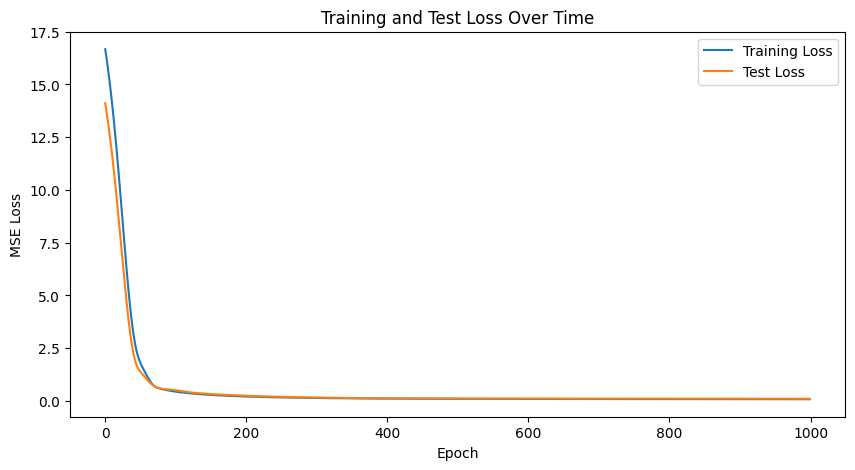

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.data[:, 2]  # petal length is at index 2

# Remove petal length from features
X = np.delete(X, 2, axis=1)  # Remove petal length from features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

# Define the MLP model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.layer1 = nn.Linear(3, 8)  # 3 input features, 8 neurons in hidden layer
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(8, 1)  # 1 output (petal length prediction)

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.layer2(x)
        return x.squeeze()

# Initialize model, loss function, and optimizer
model = SimpleMLP()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Record losses
    train_losses.append(loss.item())

    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Final evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nFinal Metrics on Test Data:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Print model parameters
print("\nModel Parameters:")
for name, param in model.named_parameters():
    print(f"{name}:")
    print(param.data)

# Plot training curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()
plt.show()